In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from glob import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

subspace_num = [1, 2, 4, 8, 0]
L2_inconsistency = np.zeros((7,5))
L1_inconsistency = np.zeros((7,5))
L0_inconsistency = np.zeros((7,5))

C3_untruthfulness = np.zeros((7,5))
C2_untruthfulness = np.zeros((7,5))
C1_untruthfulness = np.zeros((7,5))

In [2]:
algorithm_list = ["harmonica2degree", "harmonica3degree", "lime", "ks", "ig", "ih", "shaptaylor"]

all_algorithm_index_list = []

for algorithm in algorithm_list:
    files = glob(f"{algorithm}/*")
    exec(f"{algorithm}_index_list = []")
    for each in tqdm(files):
        index = each.split('/')[-1]
        eval(f"{algorithm}_index_list").append(index)
    all_algorithm_index_list.append(set(eval(f"{algorithm}_index_list")))

100%|██████████| 1000/1000 [00:00<00:00, 170333.98it/s]


[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


1 & 0.0000 & 0.0000 & 0.0000 \\ \hline 
2 & 0.0000 & 0.0000 & 0.0000 \\ \hline 
4 & 0.0000 & 0.0000 & 0.0000 \\ \hline 
8 & 0.0000 & 0.0000 & 0.0000 \\ \hline 
16 & 0.0000 & 0.0000 & 0.0000 \\ \hline 


In [3]:
all_algorithm_index_list[0].intersection_update(all_algorithm_index_list[1], all_algorithm_index_list[2])
common_index = all_algorithm_index_list[0]

In [4]:
for algorithm in algorithm_list:
    
    files = glob(f"{algorithm}/*")
    
    final_lasso_output_subspace0 = []
    final_lasso_output_subspace1 = []
    final_lasso_output_subspace2 = []
    final_lasso_output_subspace4 = []
    final_lasso_output_subspace8 = []

    final_model_output_subspace0 = []
    final_model_output_subspace1 = []
    final_model_output_subspace2 = []
    final_model_output_subspace4 = []
    final_model_output_subspace8 = []

    for each in tqdm(files):
        index = each.split('/')[-1]
        if index in common_index:
            for subspace_limit in [0, 1, 2, 4, 8]:
                try:
                    exec(f"lasso_output_subspace{subspace_limit} = np.load('{algorithm}/{index}/testindex{index}_final_lasso_output_subspace{subspace_limit}_seed123.npy')")
                    exec(f"model_output_subspace{subspace_limit} = np.load('{algorithm}/{index}/testindex{index}_final_model_output_subspace{subspace_limit}_seed123.npy')")
                    
                # for C in [1, 2, 3]:
                #     for subspace_limit in [0, 1, 2, 4, 8]:
                #         exec()
                except:
                    continue
                else:
                    eval(f"final_lasso_output_subspace{subspace_limit}").append(eval(f"lasso_output_subspace{subspace_limit}"))
                    eval(f"final_model_output_subspace{subspace_limit}").append(eval(f"model_output_subspace{subspace_limit}"))
    
    exec(f"{algorithm}L0_result = []")
    exec(f"{algorithm}L1_result = []")
    exec(f"{algorithm}L2_result = []")

    for subspace_limit in [1, 2, 4, 8, 0]:
        L0_norm = 0
        L1_norm = 0
        L2_norm = 0
        for _lasso, _model in zip(eval(f"final_lasso_output_subspace{subspace_limit}"), eval(f"final_model_output_subspace{subspace_limit}")):
            assert _lasso.shape[0] == _model.shape[0]
            # print(_lasso[0:10], _model[0:10])
            # assert 1==0
            L2_norm += np.sum(np.abs(_lasso - _model) ** 2) / _lasso.shape[0]
            L1_norm += np.sum(np.abs(_lasso - _model)) / _lasso.shape[0]
            L0_norm += np.sum(np.abs(_lasso - _model) >= 0.1) / _lasso.shape[0]

        eval(f"{algorithm}L0_result").append(L0_norm / len(eval(f"final_lasso_output_subspace{subspace_limit}")))
        eval(f"{algorithm}L1_result").append(L1_norm / len(eval(f"final_lasso_output_subspace{subspace_limit}")))
        eval(f"{algorithm}L2_result").append(L2_norm / len(eval(f"final_lasso_output_subspace{subspace_limit}")))

100%|██████████| 1000/1000 [00:35<00:00, 28.53it/s]


In [5]:
harmonica2degreeL0_result = np.array(harmonica2degreeL0_result)
harmonica2degreeL1_result = np.array(harmonica2degreeL1_result)
harmonica2degreeL2_result = np.array(harmonica2degreeL2_result)
harmonica3degreeL0_result = np.array(harmonica3degreeL0_result)
harmonica3degreeL1_result = np.array(harmonica3degreeL1_result)
harmonica3degreeL2_result = np.array(harmonica3degreeL2_result)
limeL0_result = np.array(limeL0_result)
limeL1_result = np.array(limeL1_result)
limeL2_result = np.array(limeL2_result)
ksL0_result = np.array(ksL0_result)
ksL1_result = np.array(ksL1_result)
ksL2_result = np.array(ksL2_result)
igL0_result = np.array(igL0_result)
igL1_result = np.array(igL1_result)
igL2_result = np.array(igL2_result)
ihL0_result = np.array(ihL0_result)
ihL1_result = np.array(ihL1_result)
ihL2_result = np.array(ihL2_result)
shaptaylorL0_result = np.array(shaptaylorL0_result)
shaptaylorL1_result = np.array(shaptaylorL1_result)
shaptaylorL2_result = np.array(shaptaylorL2_result)

In [6]:
L2_inconsistency[0] = harmonica2degreeL2_result
L1_inconsistency[0] = harmonica2degreeL1_result
L0_inconsistency[0] = harmonica2degreeL0_result
L2_inconsistency[1] = harmonica3degreeL2_result
L1_inconsistency[1] = harmonica3degreeL1_result
L0_inconsistency[1] = harmonica3degreeL0_result
L2_inconsistency[2] = limeL2_result
L1_inconsistency[2] = limeL1_result
L0_inconsistency[2] = limeL0_result
L2_inconsistency[3] = ksL2_result
L1_inconsistency[3] = ksL1_result
L0_inconsistency[3] = ksL0_result
L2_inconsistency[4] = igL2_result
L1_inconsistency[4] = igL1_result
L0_inconsistency[4] = igL0_result
L2_inconsistency[5] = ihL2_result
L1_inconsistency[5] = ihL1_result
L0_inconsistency[5] = ihL0_result
L2_inconsistency[6] = shaptaylorL2_result
L1_inconsistency[6] = shaptaylorL1_result
L0_inconsistency[6] = shaptaylorL0_result


In [7]:
print(L2_inconsistency)

[[0.02951787 0.02553346 0.02017003 0.01894162 0.02040619]
 [0.02122111 0.01927723 0.01616437 0.0163336  0.01746427]
 [0.06637364 0.05859071 0.05316794 0.06465069 0.07411305]
 [0.01284139 0.02369767 0.04286691 0.05891741 0.06117402]
 [0.04681459 0.08354953 0.143612   0.19126051 0.19160659]
 [0.61720747 1.15287945 2.15838389 3.40740782 3.68173937]
 [0.01846554 0.02563233 0.03147267 0.03149239 0.03251875]]


In [14]:
algorithm_list = ["harmonica2degree", "harmonica3degree", "lime", "ks", "ig", "ih", "shaptaylor"]
for mm in range(5):
    print(2**mm, end=" & ")
    print("%.4f" % L2_inconsistency[algorithm_list.index("shaptaylor")][mm], end=" & ")
    print("%.4f" % L1_inconsistency[algorithm_list.index("shaptaylor")][mm], end=" & ")
    print("%.4f" % L0_inconsistency[algorithm_list.index("shaptaylor")][mm], end=" \\\\ \hline \n")

1 & 0.0185 & 0.1020 & 0.3921 \\ \hline 
2 & 0.0256 & 0.1215 & 0.4767 \\ \hline 
4 & 0.0315 & 0.1375 & 0.5427 \\ \hline 
8 & 0.0315 & 0.1389 & 0.5518 \\ \hline 
16 & 0.0325 & 0.1403 & 0.5520 \\ \hline 


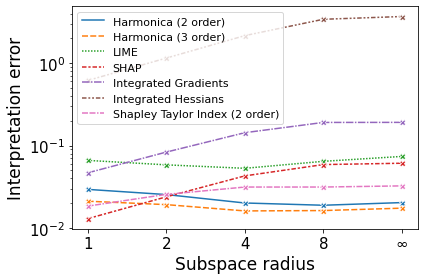

In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

index = ["1","2","4","8","∞"] 
df_L2 = pd.DataFrame(L2_inconsistency.T, index, ["Harmonica (2 order)", "Harmonica (3 order)", "LIME", "SHAP", "Integrated Gradients", "Integrated Hessians", "Shapley Taylor Index (2 order)"]) 

ax_L2 = sns.lineplot(data=df_L2, marker='X') 
# ax_L2.set(xlabel='subspace radius', ylabel='Inconsistency') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L2.set(yscale='log')
# ax_L2.set(ylim=[0,1])
ax_L2.legend(fontsize=11)
fig_L2 = ax_L2.get_figure() 
plt.tight_layout()
fig_L2.savefig("interpretation-error-vision-plot-l2.pdf")

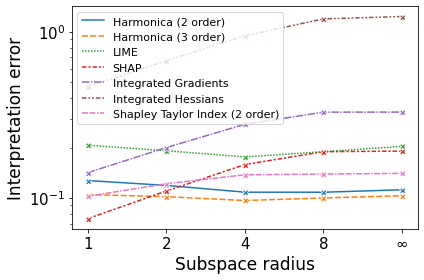

In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

index = ["1","2","4","8","∞"] 
df_L1 = pd.DataFrame(L1_inconsistency.T, index, ["Harmonica (2 order)", "Harmonica (3 order)", "LIME", "SHAP", "Integrated Gradients", "Integrated Hessians", "Shapley Taylor Index (2 order)"]) 

ax_L1 = sns.lineplot(data=df_L1, marker='X') 
# ax_L1.set(xlabel='subspace radius', ylabel='Inconsistency') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L1.set(yscale='log')
# ax_L1.set(ylim=[0,1])
ax_L1.legend(fontsize=11)
fig_L1 = ax_L1.get_figure() 
plt.tight_layout()
fig_L1.savefig("interpretation-error-vision-plot-l1.pdf")

/home/hehaowei/.conda/envs/gdn_battery/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


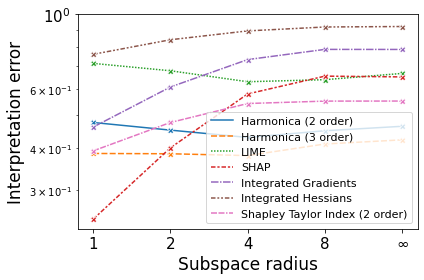

In [21]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


index = ["1","2","4","8","∞"] 
df_L0 = pd.DataFrame(L0_inconsistency.T, index, ["Harmonica (2 order)", "Harmonica (3 order)", "LIME", "SHAP", "Integrated Gradients", "Integrated Hessians", "Shapley Taylor Index (2 order)"]) 

ax_L0 = sns.lineplot(data=df_L0, marker='X') 
# ax_L0.set(xlabel='subspace radius', ylabel='Inconsistency') 
plt.xlabel('Subspace radius', fontsize=17)
plt.ylabel('Interpretation error', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax_L0.set(yscale='log')
ax_L0.set(ylim=[0,1])
ax_L0.legend(fontsize=11)
fig_L0 = ax_L0.get_figure() 
plt.tight_layout()
fig_L0.savefig("interpretation-error-vision-plot-l0.pdf")